# Introduction to Clustering

The goal of clustering is to partition the input data into subsets.

For this exercise, we will use the same iris data we used in the classification module.

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets

# load the iris data set
iris = datasets.load_iris()
# extract input output pairs
X = iris.data
Y = iris.target
cmap_data = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

def euclideanDistance(x1, x2):
    d2 = np.sum((x1 - x2)**2, axis=1)
    return np.sqrt(d2)

## k-means clustering
The idea of the k-means clustering is to find k points that will partition the data such that the overall distance between any of the training points to the nearest point in the set of k points is minimized.
An iterative procedure that tries to minimize this objective is the following:
1. start with a random set of k different points that cover the space where data lies.
2. for each of the k points find the set of points in the training data that are closer to them
3. Update the position of each of the k points by computing the mean of the set of points that where assigned in the previous step.


## Simple implementation of k-means


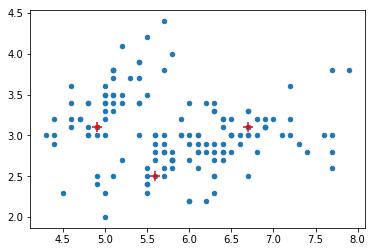

In [2]:
X_seeds = np.random.permutation(X[:])[:3]
plt.scatter(X[:,0], X[:, 1], s=20)
plt.scatter(X_seeds[:,0], X_seeds[:,1], s=100, marker='+', c='r')
plt.show()

In [3]:
def kMeansClustering(X, k, dist=euclideanDistance, max_iter=300):
    n_dims = X.shape[1]
    # select k points of the training set as seeds
    C = np.random.permutation(X[:])[:k]
    def partition(X, C):
        Y = np.zeros(X.shape[0], dtype=np.int)
        for i, Xi in enumerate(X):
            NNidx = np.argmin(dist(Xi, C))
            Y[i] = NNidx
        return Y
    iTr = 0
    clusters = partition(X,C)
    while iTr < max_iter:
        clusters_old = clusters
        for iK in range(k):
            C[iK] = np.mean(X[clusters_old == iK])
        clusters = partition(X, C)
        if np.all(clusters_old == clusters):
            break
        iTr += 1
    return clusters
    


[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 0 1 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 1 0 1 1 1 1 0 1 1 1 1
 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0 1
 1 0]


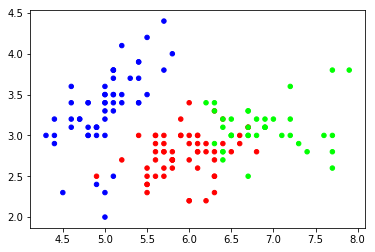

In [4]:
Y_pred = kMeansClustering(X,3)
print(Y_pred)
plt.scatter(X[:,0], X[:, 1], s=20, c=Y_pred, cmap=cmap_data)
plt.show()

## Exercise 1
Compare the simple implementation with the sklearn function sklearn.cluster.kMeans().

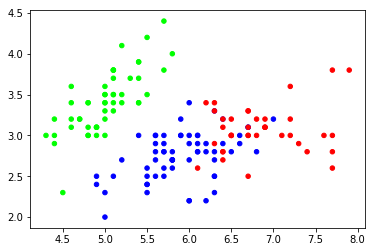

In [6]:
## Write some lines of code here
from sklearn.cluster import KMeans
my_clustering = KMeans(n_clusters=3)
Y_pred = my_clustering.fit_predict(X)
plt.scatter(X[:,0], X[:, 1], s=20, c=Y_pred, cmap=cmap_data)
plt.show()

## Exercise 2
Improve our k-means implementation by geting the best of n_runs.
For this part, we need to compute the value of the objective for a given clustering and keep the best form n_runs.

In [7]:
## Write some lines of code here
def kMeansClustering(X, k, dist=euclideanDistance, n_init=50, max_iter=300):
    n_dims = X.shape[1]
    # select k points of the training set as seeds
    
    def partition(X, C):
        Y = np.zeros(X.shape[0], dtype=np.int)
        for i, Xi in enumerate(X):
            NNidx = np.argmin(dist(Xi, C))
            Y[i] = NNidx
        return Y
    def clusterCost(X, Y, C):
        c_cost = 0.0
        for j in range(C.shape[0]):
            c_cost += np.sum(dist(X[Y==j], C[j]))
        return c_cost
    c_cost = np.zeros(n_init)
    C_total = np.zeros((n_init, k, n_dims))
    for iRep in range(n_init):
        C = np.random.permutation(X[:])[:k]
        iTr = 0
        clusters = partition(X,C)
        while iTr < max_iter:
            clusters_old = clusters
            for iK in range(k):
                C[iK] = np.mean(X[clusters_old == iK])
            clusters = partition(X, C)
            c_cost[iRep] = clusterCost(X, clusters, C)
            if np.all(clusters_old == clusters):
                break
            iTr += 1
        C_total[iRep] = C
    
    best_C = C_total[np.argmin(c_cost)]
    best_clusters = partition(X, best_C)
    return best_clusters
    

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 1 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 2 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


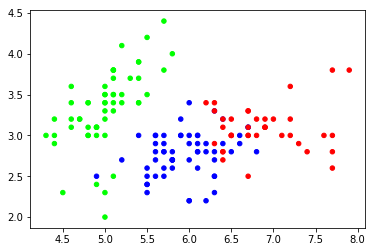

In [8]:
Y_pred = kMeansClustering(X,3)
print(Y_pred)
plt.scatter(X[:,0], X[:, 1], s=20, c=Y_pred, cmap=cmap_data)
plt.show()